## <center> Квалификационная работа по курсу "Математические методы для анализа данных" </center>


#### <center> <b><u>Выполнила:</u></b><br>студентка 120М группы<br>Ветренко Альбина Романовна </center>

#### __Суть работы:__

Для анализа предоставлены результаты петрофизических исследований, проведенных на отложениях <b>тюменской свиты</b> Западной Сибири. Отложения верхней части тюменской свиты представлены пластом песчаника Ю2, пласт характеризуется сильной изменчивостью состава, обусловленную постоянной сменой условий осадконакопления и неоднородностью палеогеографической обстановки. Благодаря своей изменчивости, данные отложения представляют большой интерес гелогов-нефтяников.

В работе необходимо определить: 
1) Структуру пород по результатам гранулометрических исследований и сравним с результатами лабораторных исследований; Также ответить на вопрос: "Можно ли на данный момент заменить лабораторный гранулометрический анализ цифровым?"

2) При лабораторном определении объёмной плотности происходит очень много допущений и погрешностей (сначала породу обтачивают, потом покрывают парафином, который может заполнить пустоты и занизить значение минералогической плотности, погрешность весов и т.д.). Определим значения объёмной плотности и сравним с лабораторными значениями, чтобы понять точность исследований и возможность/невозможность ее получения не только лабораторным способом.

3) Предположим коэффициент пористости по объёму пор и объёмной плотности, так как пористость зависит от объёма пор и плотности прямолинейно. Подобная работа поможет в дальнейшем получать значения пористости для образцов, у которых пористость не исследовалась.



In [1]:
import pandas as pd
import numpy as np
from numpy import linalg as la
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
import seaborn as sns
%matplotlib inline
import csv

In [2]:
! pip install openpyxl
! pip install tabulate

In [3]:
dfs = pd.read_excel('C:\\Users\\albin\\Anakonda\\lab_tumenskaya.xlsx', engine='openpyxl', 
                   sheet_name=['Лист2'])

Откроем таблицу не как excel, а как csv

In [4]:
filename=csv.reader('C:\\Users\\albin\\Anakonda\\gransost.csv', delimiter=';')
filename

In [5]:
with open('C:\\Users\\albin\\Anakonda\\gransost.csv', 'r') as f:
    bf = f.read()
    #print(bf)

Файл открылся неправильно, так как у него неверная кодировка текста, поменяем кодировку на 'utf-8' и прочитаем файл заново

In [6]:
df=pd.read_csv('C:\\Users\\albin\\Anakonda\\gransost_Kperm_Kpore_1.csv', sep=';', index_col=0)
df.head()

,1.0-0.9,0.9-0.8,0.8-0.7,0.7-0.6,0.6-0.5,0.5-0.4,0.4-0.3,0.3-0.2,0.2-0.1,0.1-0.09,0.09-0.08,0.08-0.07,0.06-0.05,0.04-0.03,0.02-0.01,0.01-0.005,0.004-0.003,Kп (%),Kпр (мД)
Лабораторный номер образца,,,,,,,,,,,,,,,,,,,
18946-21,0.01,0.03,0.03,0.05,0.07,0.11,0.25,0.54,6.92,7.02,11.30,11.94,9.32,31.76,6.75,9.23,4.68,13.768,0.279
18947-21,0.03,0.03,0.05,0.09,0.08,0.15,0.18,0.26,6.51,16.72,23.66,11.78,10.08,18.74,4.58,5.76,3.00,13.657,0.173
18948-21,0.01,0.02,0.06,0.08,0.17,2.52,20.13,21.01,8.96,4.43,3.44,2.54,2.49,10.83,4.01,6.03,2.58,15.853,3.606
18949-21,0.01,0.03,0.04,0.05,0.07,0.08,0.12,0.27,16.21,18.97,15.21,7.85,7.06,18.28,5.12,6.51,3.52,17.195,5.816
18950-21,0.03,0.03,0.02,0.04,0.07,0.11,0.23,0.54,17.66,18.19,15.23,9.57,6.14,15.66,4.49,5.97,3.60,16.790,5.188


Проверяем качество сортировки зёрен, то есть их однородности по размеру. Для этого построим гистограммы распределения размеров зёрен по фракциям и посмотрим их распределение. Если преобладает только одна фракция, то тогда сортировка хорошая и, следовательно, пустотное пространство в породе не будет забиваться зернами меньшего размера.

In [7]:
# columns = df.columns
# for i in columns[1:]:
    # try:
        # df[i] = df[i].astype(float)
    # except:
        # pass
df = df.astype(float, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 18946-21 to 26118-21
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   1.0-0.9      53 non-null     float64
 1   0.9-0.8      53 non-null     float64
 2   0.8-0.7      53 non-null     float64
 3   0.7-0.6      53 non-null     float64
 4   0.6-0.5      53 non-null     float64
 5   0.5-0.4      53 non-null     float64
 6   0.4-0.3      53 non-null     float64
 7   0.3-0.2      53 non-null     float64
 8   0.2-0.1      53 non-null     float64
 9   0.1-0.09     53 non-null     float64
 10  0.09-0.08    53 non-null     float64
 11  0.08-0.07    53 non-null     float64
 12  0.06-0.05    53 non-null     float64
 13  0.04-0.03    53 non-null     float64
 14  0.02-0.01    53 non-null     float64
 15  0.01-0.005   53 non-null     float64
 16  0.004-0.003  53 non-null     float64
 17  Kп (%)       53 non-null     float64
 18  Kпр (мД)     53 non-null     float64
dtypes:

In [8]:
df.loc['18946-21']

1.0-0.9         0.010
0.9-0.8         0.030
0.8-0.7         0.030
0.7-0.6         0.050
0.6-0.5         0.070
0.5-0.4         0.110
0.4-0.3         0.250
0.3-0.2         0.540
0.2-0.1         6.920
0.1-0.09        7.020
0.09-0.08      11.300
0.08-0.07      11.940
0.06-0.05       9.320
0.04-0.03      31.760
0.02-0.01       6.750
0.01-0.005      9.230
0.004-0.003     4.680
Kп (%)         13.768
Kпр (мД)        0.279
Name: 18946-21, dtype: float64

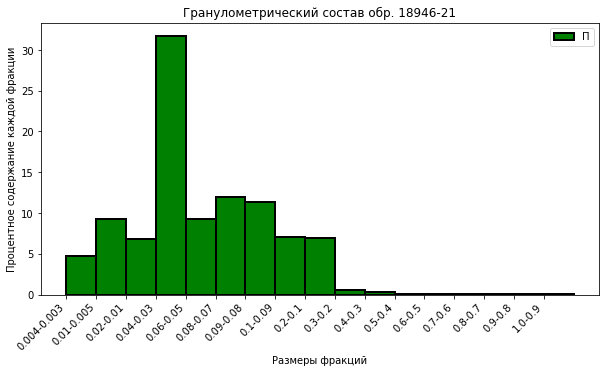

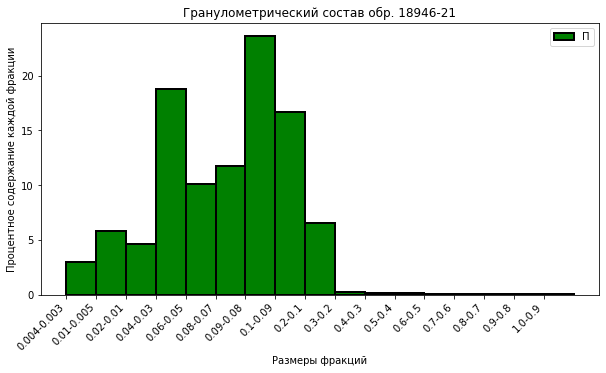

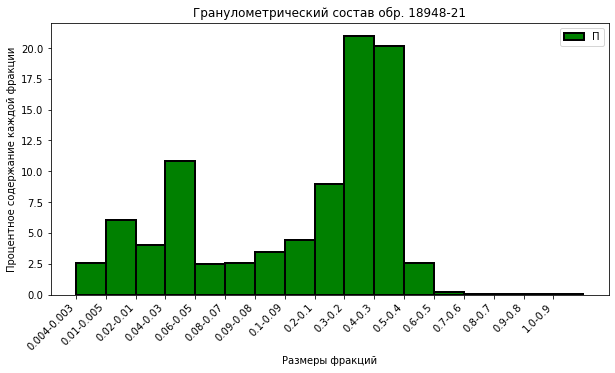

In [9]:
#plt.subplots(2,2)
line=df.loc['18946-21'][:-2][::-1] # работаем с первой строкой
hf_fr=line.to_dict()  # создаем словарь, где ключ- фракция, а значение- процентное содержание фракции
plt.figure(figsize=(10, 5)) # задаем размер поля, ширина и длина 
plt.bar(hf_fr.keys(), height=hf_fr.values(),linewidth=2.0, edgecolor='k', width=1, align='edge', color='green') # делаю контур графиков, настраиваю их ширину
plt.xlabel('Размеры фракций')                                                     # делаю разметки по графикам
plt.ylabel('Процентное содержание каждой фракции')
plt.xticks(rotation=45, ha='right') # повернули текст на 45 градусов
plt.rcParams.update({'font.size': 10}) # настраиваем размер текста
plt.title('Гранулометрический состав обр. 18946-21')
plt.legend('Процент')
plt.show()

line=df.loc['18947-21'][:-2][::-1] # работаем с первой строкой
hf_fr=line.to_dict()  # создаем словарь, где ключ- фракция, а значение- процентное содержание фракции
plt.figure(figsize=(10, 5)) # задаем размер поля, ширина и длина 
plt.bar(hf_fr.keys(), height=hf_fr.values(),linewidth=2.0, edgecolor='k', width=1, align='edge', color='green') # делаю контур графиков, настраиваю их ширину
plt.xlabel('Размеры фракций')                                                     # делаю разметки по графикам
plt.ylabel('Процентное содержание каждой фракции')
plt.xticks(rotation=45, ha='right') # повернули текст на 45 градусов
plt.rcParams.update({'font.size': 10}) # настраиваем размер текста
plt.title('Гранулометрический состав обр. 18946-21')
plt.legend('Процент')
plt.show()

line=df.loc['18948-21'][:-2][::-1] # работаем с первой строкой
hf_fr=line.to_dict()  # создаем словарь, где ключ- фракция, а значение- процентное содержание фракции
plt.figure(figsize=(10, 5)) # задаем размер поля, ширина и длина 
plt.bar(hf_fr.keys(), height=hf_fr.values(),linewidth=2.0, edgecolor='k', width=1, align='edge', color='green') # делаю контур графиков, настраиваю их ширину
plt.xlabel('Размеры фракций')                                                     # делаю разметки по графикам
plt.ylabel('Процентное содержание каждой фракции')
plt.xticks(rotation=45, ha='right') # повернули текст на 45 градусов
plt.rcParams.update({'font.size': 10}) # настраиваем размер текста
plt.title('Гранулометрический состав обр. 18948-21')
plt.legend('Процент')
plt.show()
#sns.histplot(line, kde=True)

У первых трех образцов наблюдается следующая картина: у образца 18946-21 сортировка хорошая, так как преобладает фракция 0.06-0.05 среднезернистого алевролита, у остальных образцов наблюдается как крупнозернистый материал, так и крупнозернистый, что будет влиять в первую очередь на пористость, добывать из такого коллектора будут в последнюю очередь.

# Стандартное отклонение показывает, насколько далеко от среднего арифметического находятся точки данных. Рассчитывается по формуле:
$
\sigma = \sqrt\frac{\Sigma{(x_{i}-\bar{x})^2}}{N}
$

где $\sigma$ - среднеквадратичное отклонение;
$x{i}$ - каждый элемент выборки;
$\bar{x}$ - среднее значение для совокупности;
N - размер выборки

Задачи гранулометрического анализа можно поделить на 4 группы: 
1) точное определение механического состава и названия породы, что в дальнейшем определяет предположения о фильтрационных свойствах;

2) реконструкция условий осадконакопления;

3) подготовка к исследованию зёрен другими методами (пикнометрический метод для определения минералогической плотности)

Для прогнозирования фильтрационно-емкостных свойств геолога интересует значение стандартного отклонения, так как оно даёт представление об однородности зёрен по размеру и определяет использовать среднее значение для определения типа породы.

При классическом лабораторном анализе можно получить примерные значения стандартного отклонения, так как мы не знаем значение диаметра каждого зерна и количество зёрен определенного диаметра. Уточнить результаты можно с помощью обработки цифрового двойника и дальше сравнить полученные значения.
Обработка цифрового двойника происходит следующим образом: берется томография образца, по которой строится 3D-модель, далее делается виртуальное разделение образцов, считается эквивалентный диаметр (диаметр сферы того же объёма, что и образец). На выходе получается таблица со значениями по каждому зерну, а далее идёт расчёт стандартного отклонения.

Загрузим таблицу с данными по эквивалентному диаметру каждого зерна.

In [10]:
lab = pd.read_csv('C:\\Users\\albin\\Anakonda\\ekv_diam_1 (2).csv', sep=';', index_col=0)
lab
# значения в мкм


,обр. 19-038,обр. 21-040,обр. 13-130,обр. 3-130,обр. 60-018,обр. 87-140,обр. 2-145,обр. 114-024,обр. 22-100,обр. 55-072
номер зерна,,,,,,,,,,
1,104.67800,48.0578,67.3294,54.4552,143.4780,143.4780,108.2040,91.1866,128.5930,46.0446
2,149.19900,62.3354,46.8140,75.2453,215.7790,215.7790,56.4419,63.4982,106.0100,56.0652
3,52.80050,126.1880,74.4812,42.9082,109.3230,109.3230,88.4536,81.4464,53.5022,69.4399
4,65.12420,143.2550,104.7500,39.2498,62.4635,62.4635,75.5978,48.6672,66.7542,107.5500
5,109.29300,70.3980,135.9650,94.3063,159.6760,159.6760,88.5974,21.6968,62.1816,45.6423
...,...,...,...,...,...,...,...,...,...,...
11796,3.07777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11797,3.38752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11798,4.26801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Добавим данные в список, чтобы построить гистограммы распределения и сделать вывод о сортировке <b>цифровых двойников</b> образцов.
Загрузим данные в список, чтобы дальше построить гистограммы распределения зерен по размеру.

In [11]:
lab_col=lab.columns
lab_sp=[]
for i in lab_col:
    lab_sp.append(lab[i].dropna())
    
lab_sp

[номер зерна
 1        104.67800
 2        149.19900
 3         52.80050
 4         65.12420
 5        109.29300
            ...    
 11796      3.07777
 11797      3.38752
 11798      4.26801
 11799      4.74599
 11800      3.87775
 Name: обр. 19-038, Length: 11800, dtype: float64,
 номер зерна
 1       48.05780
 2       62.33540
 3      126.18800
 4      143.25500
 5       70.39800
          ...    
 881    102.19200
 882      5.79258
 883      2.68868
 884      3.07777
 885      2.68868
 Name: обр. 21-040, Length: 885, dtype: float64,
 номер зерна
 1        67.32940
 2        46.81400
 3        74.48120
 4       104.75000
 5       135.96500
           ...    
 1103     50.06540
 1104     72.79910
 1105     81.46050
 1106      2.13401
 1107      2.68868
 Name: обр. 13-130, Length: 1107, dtype: float64,
 номер зерна
 1      54.45520
 2      75.24530
 3      42.90820
 4      39.24980
 5      94.30630
          ...   
 479     2.59463
 480     3.74211
 481     6.35116
 482     2.26662
 

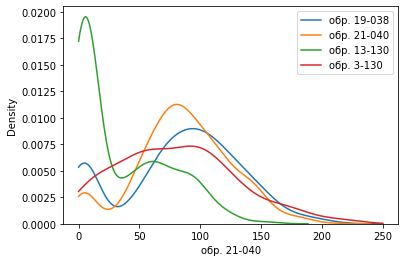

In [12]:
sns.kdeplot(data=lab_sp[1],clip=(0.0, 250.0))
sns.kdeplot(data=lab_sp[2],clip=(0.0, 250.0))
sns.kdeplot(data=lab_sp[3],clip=(0.0, 250.0))
sns.kdeplot(data=lab_sp[4],clip=(0.0, 250.0))
plt.legend(lab_col)

Для сопоставления определения стандартного отклонения с помощью лабораторного и цифрового метода я отобрала образцы, у которых есть и лабораторные данные, и томографические стеки. По кривым распределения можно сказать, что у данной коллекции преобладает хорошая сортировка зёрен.

Посчитаем стандартное отклонение для каждого цифрового двойника функцией .std() и подгрузим значения стандартных отклонений, полученные с обработки лабораторных образцов.

In [56]:
lab_std = lab.std() # считаем стандартное отклонение
dframe = pd.DataFrame(lab_std)
dframe[1]=[28.9, 46.4, 35.4, 36.5, 37.5, 37.0, 38.8, 56.4, 38.6, 47.1] # подгружаем лабораторные данные
dframe.columns = ['St_otkl_lab', 'St_otkl_cifra']  # стандартное отклонение в мкм
dframe

,St_otkl_lab,St_otkl_cifra
обр. 19-038,30.195518,28.9
обр. 21-040,48.401966,46.4
обр. 13-130,38.995810,35.4
обр. 3-130,37.261048,36.5
обр. 60-018,48.699290,37.5
обр. 87-140,48.699290,37.0
обр. 2-145,41.542017,38.8
обр. 114-024,59.073240,56.4
обр. 22-100,42.589816,38.6
обр. 55-072,50.618316,47.1


Посмотрим их взаимосвязь через линейную регрессию

Text(0, 0.5, 'Станд. отклонение цифровое')

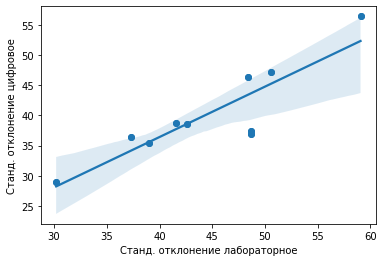

In [59]:
plt.scatter(x=dframe['St_otkl_lab'], y=dframe['St_otkl_cifra'])
sns.regplot(x=dframe['St_otkl_lab'], y=dframe['St_otkl_cifra'], data=dframe) 
plt.xlabel('Станд. отклонение лабораторное')
plt.ylabel('Станд. отклонение цифровое')
# голубая область - доверительный интервал

In [15]:
from sklearn.metrics import r2_score
r2_score(dframe['St_otkl_lab'], dframe['St_otkl_cifra'])

0.4591571395280363

Коэффициент детерминации показывает, что сходимость полученных значений маленькая, наблюдаются выбросы. Однако, в целом, тренд сохраняется. Понять причину такой низкой сходимости - отдельная задача, которая требует самостоятельного проведения как лабораторного анализа (зерна можно слишком сильно перетереть или, наоборот, недотереть, можно потерять несколько граммов навески при фракционном анализе, неправильно взвешивать фракции и т.д. - причин такой погрешности очень много), так и более точного разбиения на зерна цифровой модели.

# Обработка результатов петрофизических исследований

In [16]:
pet=pd.read_csv('C:\\Users\\albin\\Anakonda\\petrophysics.csv', sep=';', index_col=0)
pet.head()

,Длина,Диаметр,Vобр,"Масса, г",Давление,Vпор,"Кп, мД","Кпр, мД","rhob_объемная, r/см3","rhob_мин, г/см3"
Номер образца,,,,,,,,,,
2108,3.037,3.015,21.680,50.791,501.0,3.036,14.002,0.555,2.342558,2.723967
2110,3.037,3.014,21.661,48.712,499.1,3.160,14.587,35.951,2.248162,2.632108
2111,3.039,3.020,21.762,49.449,494.2,2.987,13.724,1.221,2.271621,2.632970
2113,3.030,3.035,21.920,50.384,493.9,2.733,12.466,0.585,2.298558,2.625904
2115,3.048,3.020,21.833,50.054,484.1,2.765,12.666,0.296,2.292624,2.625122


Посмотрим разброс значений по каждому параметру: максимальные и минимальные значения:

In [17]:
max_val = pet.max()
print(max_val)
print('______________')
min_val = pet.min()
print(min_val)

Длина                      3.350000
Диаметр                    3.400000
Vобр                      29.144000
Масса, г                  59.579000
Давление                 522.600000
Vпор                       5.511000
Кп, мД                    24.920000
Кпр, мД                 1305.302000
rhob_объемная, r/см3       2.892168
rhob_мин, г/см3            3.252772
dtype: float64
______________
Длина                     2.921000
Диаметр                   2.922000
Vобр                     20.245000
Масса, г                 40.839000
Давление                453.100000
Vпор                      0.069000
Кп, мД                    0.313000
Кпр, мД                   0.016000
rhob_объемная, r/см3      1.639892
rhob_мин, г/см3           1.879640
dtype: float64


Так как все параметры имеют разный диапазон значений, их необходимо нормализовать для того, чтобы потом их можно было сравнивать между собой и использовать для расчёта схожести объектов.
Нормализация проходит по формуле через максимальное и минимальное значение:

$
x_{norm} = \frac{x-x_{min}}{x_{max}-x_{min}}
$

Нормализация данных не происходит с помощью стандартизации, так как у функций вид распределения не соответствует нормальному (самый типичный пример - коэффициент проницаемости), поэтому результат при таком методе испортит данные.

In [18]:
data_norm = (pet - min_val)/ (max_val - min_val)
data_norm

,Длина,Диаметр,Vобр,"Масса, г",Давление,Vпор,"Кп, мД","Кпр, мД","rhob_объемная, r/см3","rhob_мин, г/см3"
Номер образца,,,,,,,,,,
2108,0.270396,0.194561,0.161254,0.531057,0.689209,0.545204,0.556305,0.000413,0.561111,0.614892
2110,0.270396,0.192469,0.159119,0.420117,0.661871,0.567990,0.580079,0.027530,0.485732,0.547994
2111,0.275058,0.205021,0.170469,0.459445,0.591367,0.536200,0.545008,0.000923,0.504465,0.548621
2113,0.254079,0.236402,0.188223,0.509338,0.587050,0.489526,0.493884,0.000436,0.525976,0.543476
2115,0.296037,0.205021,0.178447,0.491729,0.446043,0.495406,0.502012,0.000215,0.521237,0.542906
...,...,...,...,...,...,...,...,...,...,...
2148,0.265734,0.194561,0.159906,0.451708,0.381295,0.620544,0.633478,0.000746,0.507541,0.601594
2184,0.272727,0.194561,0.162378,0.361846,0.477698,0.662073,0.675214,0.003713,0.443745,0.555918
2189,0.251748,0.188285,0.150242,0.466382,1.000000,0.503308,0.515951,0.000466,0.524944,0.554331


Посмотрим попарную зависимость петрофизических параметров с помощью <b>коэффициента корреляции Пирсона</b>, который изменяется в интервале [-1;1]. Чем дальше коэффициент корреляции от 0, тем сильнее связь между двумя переменными. -1 показывает обратную зависимость переменных, 0 показывает полное отстутствие линейной корреляции между двумя переменными, 1 показывает полнуую линейную корреляцию между двумя переменными. 
<b>Коэффициент корреляции Пирсона</b>- это ковариация двух переменных, деленная на произведение их стандартных отклонений:
$ 
w = \frac{\sum((x_i-\overline{x})(y_i-\overline{y})}{\sqrt(\sum(x_i-\overline{x})^2\sum(y_i-\overline{y})^2)}
$

<b>Ковариация</b> - это мера совместной изменчивости двух величин: если большие значения одной переменной соответствуют большим значениям другой переменной и то же самое верно для меньших значений, то ковариация положительна. Показывает тенденцию линейной зависимости между переменными. Если между переменными нет связи, то ковариация равна 0. Измеряет только направление, но не силу взаимосвязи.

<b>Корреляция</b>- это ковариация стандартизированных переменных. Деление на произведение стандартных отклонений нормализует коэффициент, благодаря чему можно сравнивать коэффициенты корреляции и смотреть степень взаимосвязи параметров.

<AxesSubplot:>

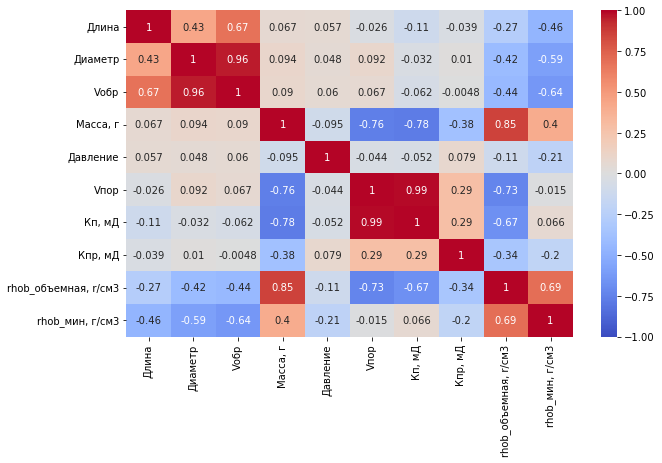

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(pet.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

Наблюдается высокая корреляция между минералогической плотностью и объёмом образца, коэффициентом пористости и объёмной плотностью. ИНТЕРЕСНО, что нет никакой зависимости между <b>коэффициентом пористости и минералогической плотностью</b>, так как в теории она есть: чем выше минералогическая плотность, тем больше твердой фазы в образце и тем меньше пустот в ней. В чем может быть проблема: минералогическую плотность получили методом насыщения пластовой водой, глинистые минералы набухли и значения плотности получились завышены, а пористость перед этим анализом измеряли газом, никакого взаимодействия с породой не было, и полученный коэффициент пористости получился более приближенным к реальности.

<AxesSubplot:>

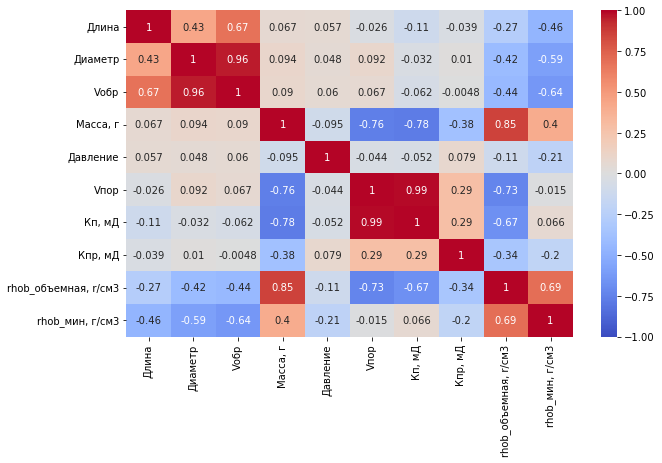

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(data_norm.corr(), vmin=-1, vmax=1, annot= True, cmap='coolwarm')

При нормировке данных зависимость между параметрами не поменялась, так как масштаб данных на значение коэффициент Пирсона не влияет.

Необходимо избавиться от сильно коррелирующих признаков, которые не информативны и которые для дальнейшей работы бесполезны: длина, диаметр и масса, давление.

In [21]:
data_norm_chist=data_norm.drop(columns=['Диаметр', 'Длина', 'Масса, г', 'Давление'])
data_norm_chist

,Vобр,Vпор,"Кп, мД","Кпр, мД","rhob_объемная, r/см3","rhob_мин, г/см3"
Номер образца,,,,,,
2108,0.161254,0.545204,0.556305,0.000413,0.561111,0.614892
2110,0.159119,0.567990,0.580079,0.027530,0.485732,0.547994
2111,0.170469,0.536200,0.545008,0.000923,0.504465,0.548621
2113,0.188223,0.489526,0.493884,0.000436,0.525976,0.543476
2115,0.178447,0.495406,0.502012,0.000215,0.521237,0.542906
...,...,...,...,...,...,...
2148,0.159906,0.620544,0.633478,0.000746,0.507541,0.601594
2184,0.162378,0.662073,0.675214,0.003713,0.443745,0.555918
2189,0.150242,0.503308,0.515951,0.000466,0.524944,0.554331


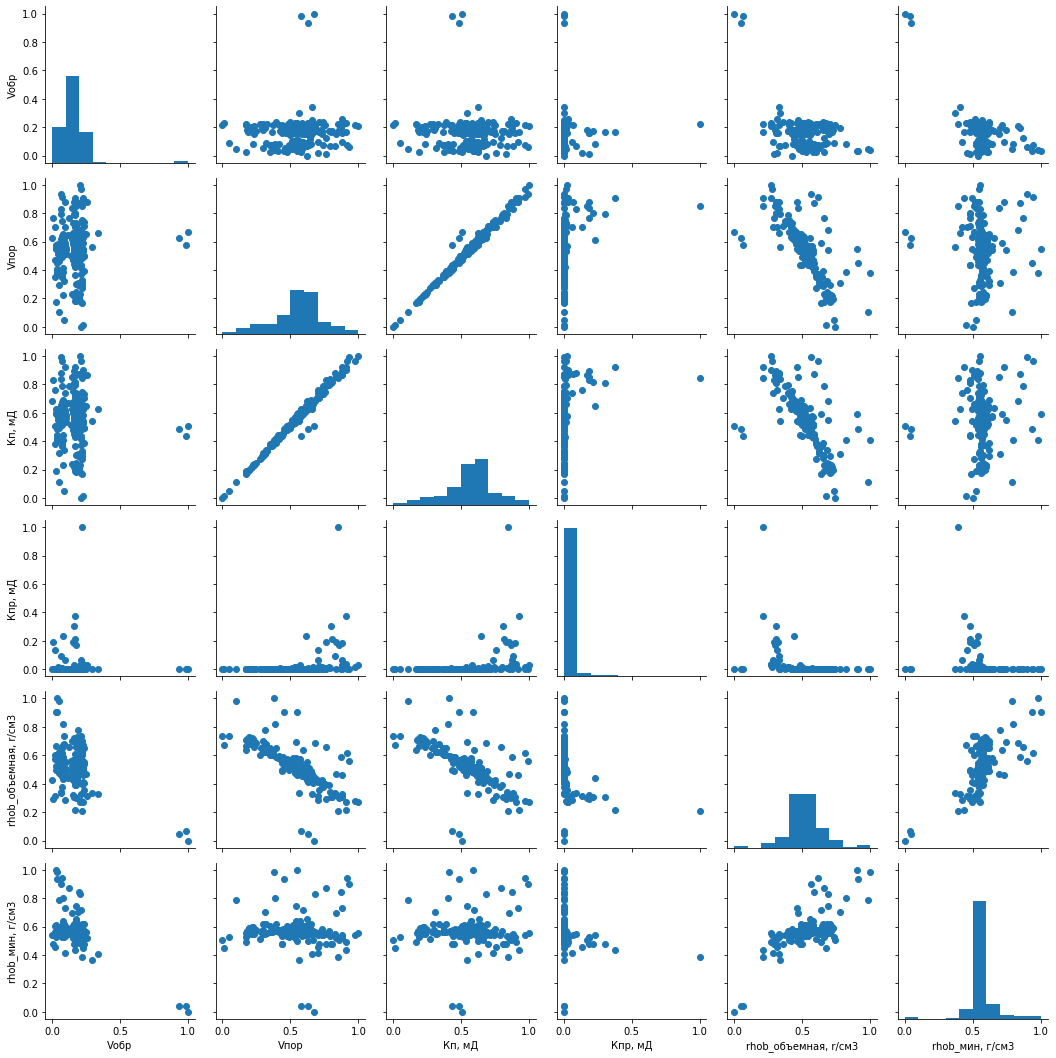

In [24]:
x = sns.PairGrid(data_norm_chist)
x = x.map_diag(plt.hist)
x = x.map_offdiag(plt.scatter)

На построенных петрофизических зависимостях наблюдается большое количество разбросов значений, особенно на графике коээфициент пористости - объёмная плотность. В теории они не считаются выбросами, так как работа идет с одними и теми же отложениями, которые характеризуются изменчивостью в составе (структуре). В петрофизике бывают хорошие петрофизические зависимости без разбросов, но строятся они по очень маленькой выборке - 10-20 образцов.

Посмотрим разброс значений с помощью box-плота на примере коэффициента пористости.

<AxesSubplot:title={'center':'разброс пористости'}>

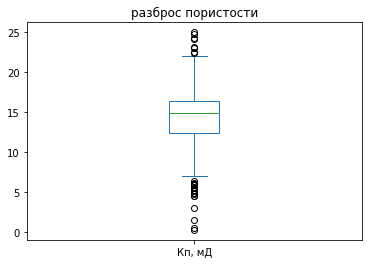

In [25]:
pet['Кп, мД'].plot.box(title='разброс пористости')

Наблюдаемый разброс значений плох для построения регрессий и обучения моделей, однако с точки зрения геологии и строения пласта Ю2 тюменской свиты это нормальная картина из-за сильной литологической изменчивости.
Посчитаем квантили и IQR, которые могут пригодиться для дальнейшей работы

In [26]:
Q1 = pet['Кп, мД'].quantile(0.25)
Q3 = pet['Кп, мД'].quantile(0.75)
IQR = Q3-Q1
Q1, Q3, IQR #межквантильный диапазон, показывает значение, соответствующее 50%

(12.384, 16.299, 3.914999999999999)

Предскажем значения объёмной плотности по коэффициенту пористости и сравним с лабораторными результатами с помощью линейной регрессии.

Text(0, 0.5, 'Объёмная плотность')

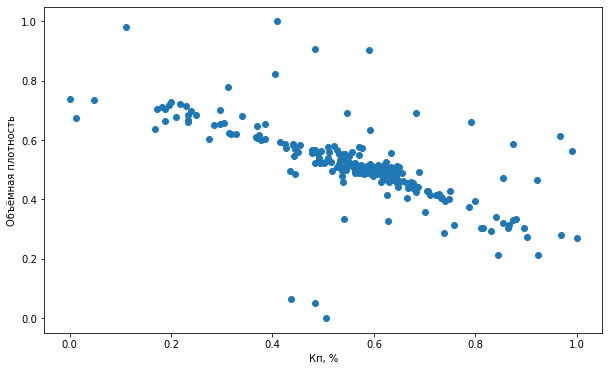

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(x=data_norm_chist['Кп, мД'], y=data_norm_chist['rhob_объемная, r/см3'])
plt.xlabel('Кп, %')
plt.ylabel('Объёмная плотность')

Выбросы удалять не будем, так как тогда изменится общее представление об отложениях. Приступим к построению линейной регрессии.

In [28]:
pet_spisok=[]
pet_spisok.append(data_norm_chist['Кп, мД'])

pet_spisok_rhob=[]
pet_spisok_rhob.append(data_norm_chist['rhob_объемная, r/см3'])

pet_spisok_rhob
pet_spisok

[Номер образца
 2108    0.556305
 2110    0.580079
 2111    0.545008
 2113    0.493884
 2115    0.502012
           ...   
 2148    0.633478
 2184    0.675214
 2189    0.515951
 2296    0.622099
 2287    0.740033
 Name: Кп, мД, Length: 225, dtype: float64]

Необходимо найти сдвиг и наклон функции, обобщающей существующие данные. Осуществим с помощью <b>метода наименьших квадратов</b>. Метод заключается в минимизации суммы квадратов отклонений точек, соответствующих реальным наблюдениям данных, от линии регрессии:
$
\sum(y_i-(wx_i+b))^2\rightarrow min
$


Обобщающая функция представлена в виде: 
$y=w*x+b$, которая как раз и минимизирует расстояние.

$w$ - наклон, который находится по следующей формуле: 
$ 
w = \frac{\sum((x_i-\overline{x})(y_i-\overline{y})}{\sum(x_i-\overline{x})^2}
$


$b$ - сдвиг, который находится по формуле: $b=\overline{y}-w\overline{x}$


In [29]:
pet_spisok=data_norm_chist['Кп, мД'].to_numpy()
pet_spisok_rhob=data_norm_chist['rhob_объемная, r/см3']

x_mean=np.mean(pet_spisok)
y_mean=np.mean(pet_spisok_rhob)

numerator=0
#sp_num=[]
denominator=0
#sp_den=[]
#for i in range(len(pet_spisok)): # вычислили числитель и знаменатель
numerator =((pet_spisok-x_mean)*(pet_spisok_rhob-y_mean)).sum()
denominator =((pet_spisok-x_mean)**2).sum()
    
# найдем наклон и сдвиг
w = numerator/denominator
b = y_mean - w*x_mean

#sp_num.append(numerator)
#summa_w=np.sum(sp_num)

#sp_den.append(denominator)
#summa_d=np.sum(sp_den)

#w=summa_w/summa_d
print(f'Наклон:{w}; Сдвиг:{b}')

Наклон:-0.48923282772611876; Сдвиг:0.7895776834432481


Получается уравнение вида $y = -0.48923282772611876*x + 0.7895776834432481$

Применим класс LinearRegression, чтобы проверить адекватность посчитанных вручную данных

In [30]:
Kp=data_norm_chist['Кп, мД'].values
rhob=data_norm_chist['rhob_объемная, r/см3'].values
x=np.array(Kp)
y=np.array(rhob)
model = LinearRegression()
model.fit(x.reshape(-1,1),y)
model.coef_, model.intercept_

(array([-0.48923283]), 0.789577683443248)

Значения сдвига и наклона, полученные вручную, сходятся со значениями, полученными с помощью встроенной функции

Text(0, 0.5, 'Объёмная плотность')

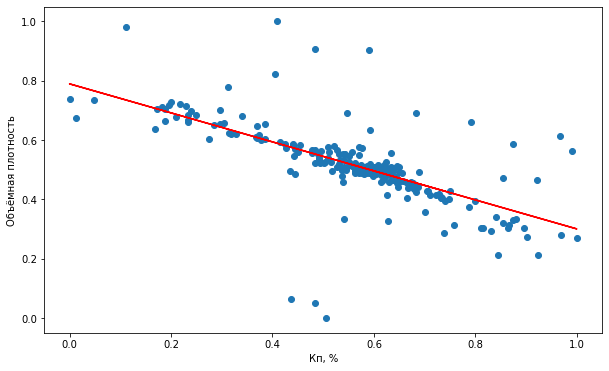

In [31]:
x_y=np.array(Kp).reshape(-1,1)
plt.figure(figsize=(10,6))
plt.scatter(x=data_norm_chist['Кп, мД'], y=data_norm_chist['rhob_объемная, r/см3'])
plt.plot(x_y, model.predict(x_y), color='red')
plt.xlabel('Кп, %')
plt.ylabel('Объёмная плотность')


Сделаем прогноз и рассчитаем среднеквадратичную ошибку для оценки качества модели
<b>Средняя квадратичная ошибка (MSE)</b> измеряет среднее значение квадратов ошибок, то есть среднеквадратичную разницу между оцененными и фактическими значениями. 

In [32]:
y_pred_least_squares = model.predict(x_y)
from sklearn import metrics
metrics.mean_squared_error(y, y_pred_least_squares) # среднеквадратич. ошибка

0.009459779747572753

Посмотрим <b>коэффициент детерминации</b> $R^2$ - это статистический показатель, отражающий объясняющую способность регрессии. Насколько регрессия приближена к данным. Изменяется от 0 до 1. Чем коэффициент ближе к 1, тем модель больше соотвтетствует данным.
$
R^2=1-\frac{\sum(y_i-\hat{y})^2}{\sum(y_i-\overline{y})^2}
$
$y_i$-фактические данные;
$\hat{y}$-моделируемые данные;
$\overline{y}$-среднее значение фактических данных;
$SEE=\sum(y_i-\hat{y})^2$-сумма квадратов остатков (ошибок) регрессии;
$STT=\sum(y_i-\overline{y})^2$-полная сумма квадратов, т.е. сумма квадратов отклонений точек данных от среднего значения.


In [33]:
model.score(x_y,y)

0.45421057578386514

Text(0, 0.5, 'Объёмная плотность предсказанная')

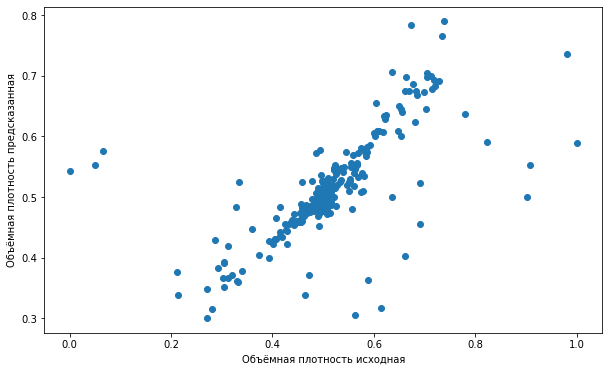

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(y,y_pred_least_squares)
plt.xlabel('Объёмная плотность исходная')
plt.ylabel('Объёмная плотность предсказанная')

### Сделаем то же самое градиентным спуском

<b>Градиентный спуск</b> - метод, с помощью которого минимизация ошибки происходит по движению антиградиента.
Применим среднеквадратичную ошибку: $J=1/n{\sum(y_i-y_p)^2}$, которую необходимо минимизировать

где $y_p$ - функция, полученная при значении коэффициентов $w$,$b$

$y_p=wx_i+b$

$y_i$, $x_i$ - значение, полученное при наблюдении i


Необходимо взять частные производные по наклону и по сдвигу.
Производная по <b>наклону $w$</b>:

$\frac{\partial J}{\partial w} = \frac{1}{n}\frac{\partial J}{\partial w}(y_i-(wx_i+b))^2) = 0\\
    \frac{\partial J}{\partial w} = \frac{2}{n}(y-(wx+b))\frac{\partial J}{\partial w}(y_i-(wx_i+b)) = 0\\
    \frac{\partial J}{\partial w} = \frac{2}{n}(y-(wx+b))\frac{\partial J}{\partial w}(0-(x_i+0))^2) = 0$
Итоговая формула производной выглядит следующим образом:
$\frac{\partial J}{\partial w} = \frac{2}{n}(-x_i)(y_i-(wx_i+b)) = 0$

Аналогичным образом получаем производную по <b>сдвигу $b$</b>:
    $\frac{\partial J}{\partial w} = \frac{1}{n}\frac{\partial J}{\partial w}(y_i-(wx_i+b))^2) = 0\\
    \frac{\partial J}{\partial w} = \frac{2}{n}(y_i-(wx_i+b))\frac{\partial J}{\partial w}(y_i-(wx_i+b)) = 0\\
    \frac{\partial J}{\partial w} = \frac{2}{n}(y_i-(wx_i+b))\frac{\partial J}{\partial w}(0-(0+1))^2) = 0$
Итоговая формула производной по сдвигу выглядит следующим образом:
$\frac{\partial J}{\partial w} = \frac{2}{n}((wx_i+b)-y_i) = 0$

На вход функция принимает необходимые данные, количество итераций и "шаг" обучения.

In [35]:
def regression(X, w, b):
    return w * X + b

In [36]:
def partial_w(X, y, w, b, n):
      return (2/n)*np.sum((-X) * ((w * X + b) - y))

In [37]:
def partial_b(X, y, w, b, n):
      return (2/n)*np.sum((w * X + b) - y)

In [38]:
def gradient_descent(X, y, iter, learning_rate):
    
    w, b = 0, 0  # изначальные веса
    n = len(X)   # количество наблюдений
 
    w_list, b_list= [], [] # создадим списки для записи весов модели и уровня ошибки
 
    for i in range(iter):
        w_list.append(w)  # добавим в списки текущие веса
        b_list.append(b)
        par_1 = partial_w(X, y, w, b, n) # рассчитаем текущее значение частных производных
        par_2 = partial_b(X, y, w, b, n)
        w = w - learning_rate * par_1  # обновим веса в направлении антиградиента
        b = b - learning_rate * par_2   # выведем списки с уровнями ошибки и весами
        
    return w_list, b_list

In [39]:
w_list, b_list = gradient_descent(Kp, rhob, iter=100, learning_rate=0.020)
print(w_list[-1], b_list[-1])

-0.3559610150140511 0.6857554723877871


   Результаты не сходятся с методом МНК, сложно подобрать количество итераций и шаг обучения

### Множественная линейная регрессия

Построим множественную регрессию, на основе которой предположим коэффициент пористости по объёму пор и объёмной плотности.

In [40]:
pet_data=pet[['Vпор', 'rhob_объемная, r/см3']].values
pet_target= pet[['Кп, мД']].values # целевая переменная 
X, y = scale(pet_data), pet_target

In [41]:
r_mod = LinearRegression()
r_mod.fit(X, y)
print('Коэффициент детерминации равен:', r_mod.score(X,y))

Коэффициент детерминации равен: 0.9875263301839478


Коэффициент детерминации показывает хорошую сходимость признаков и целевой переменной.

In [42]:
print('intercept:', r_mod.intercept_) # пересечение с осью y
print('slope:', r_mod.coef_)

intercept: [14.18464]
slope: [[4.75859331 0.45972876]]


Функция множественной регрессии имеет вид: $y=14.18464+4.75859331*x_1+0.45972876*x_2$

In [43]:
y_pred = r_mod.predict(X)
print('prediction', y_pred, sep='\n') # предсказанная пористость

prediction
[[14.14331211]
 [14.49009728]
 [13.70445189]
 [12.53003312]
 [12.67090698]
 [11.17141973]
 [13.51004254]
 [13.52383473]
 [14.76976691]
 [14.45707327]
 [14.94628834]
 [14.94854977]
 [15.38260205]
 [14.94589622]
 [15.13846909]
 [14.71349081]
 [14.98558209]
 [15.31617057]
 [16.17177799]
 [16.30045818]
 [15.61853591]
 [16.42117476]
 [16.02064824]
 [15.54027573]
 [15.51487876]
 [12.6565876 ]
 [15.54697071]
 [15.63610142]
 [15.42511583]
 [14.21568581]
 [13.15907075]
 [12.11943766]
 [11.34066033]
 [13.44567459]
 [13.40953873]
 [14.48957263]
 [15.67425391]
 [14.68335902]
 [16.04637176]
 [16.32987489]
 [16.98346416]
 [17.66674651]
 [12.85067533]
 [13.81181741]
 [15.57627373]
 [18.39724496]
 [16.59001539]
 [16.89549669]
 [16.88957291]
 [17.04804108]
 [10.99368977]
 [16.55385383]
 [15.30621397]
 [15.47143295]
 [12.60551372]
 [16.21650597]
 [11.29474539]
 [12.09679943]
 [16.1067854 ]
 [14.23762614]
 [17.32185293]
 [20.01813634]
 [ 6.15134583]
 [ 6.15889219]
 [10.83363364]
 [ 6.5552041 ]

<function matplotlib.pyplot.show(close=None, block=None)>

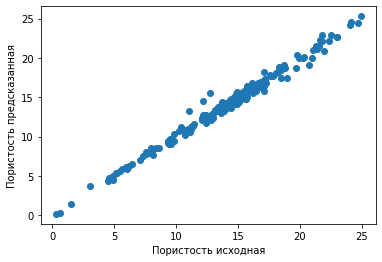

In [44]:
plt.scatter(y, y_pred)
plt.xlabel('Пористость исходная')
plt.ylabel('Пористость предсказанная')
plt.show

Из-за того, что нет типизации по литотипам и работа идет со всеми отложениями в общем, не получается в точности описать данные.

В работе не было разбивки данных на трейн и тест, так как отложения неоднородны (обученная модель с большой долей вероятности не сработает на другом литотипе) и данных в принципе мало.

# (Дополнительная часть работы) Попытка убрать выбросы(другие литотипы пород) и построить модель только для одного литотипа

In [45]:
pet_copy = data_norm_chist.copy()

In [46]:
print('размер датасета до удаления выбросов', pet.shape)

размер датасета до удаления выбросов (225, 10)


In [47]:
Q1 = pet_copy['Кп, мД'].quantile(0.25)
Q3 = pet_copy['Кп, мД'].quantile(0.75)
IQR = Q3-Q1
IQR

0.1591010688015605

In [48]:
pet_copy_sh= pet[~((pet_copy['rhob_объемная, r/см3'] < (Q1 - 1.5*IQR))| (pet_copy['rhob_объемная, r/см3']>(Q3+1.5*IQR)))]
pet_copy_sh.shape

(216, 10)

In [49]:
Q1 = pet_copy['rhob_объемная, r/см3'].quantile(0.25)
Q3 = pet_copy['rhob_объемная, r/см3'].quantile(0.75)
IQR = Q3-Q1
IQR

0.11138528186067559

In [50]:
#pet_copy_sh= pet_copy[~((pet_copy['rhob_объемная, r/см3'] < (Q1 - 1.5*IQR))| (pet_copy['rhob_объемная, r/см3']>(Q3+1.5*IQR)))]
#pet_copy_sh.shape

Text(0, 0.5, 'Объёмная плотность')

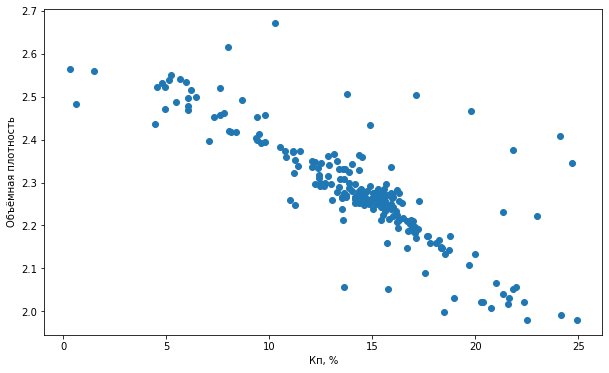

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(x=pet_copy_sh['Кп, мД'], y=pet_copy_sh['rhob_объемная, r/см3'])
plt.xlabel('Кп, %')
plt.ylabel('Объёмная плотность')

# Кластеризация методом ближайшего соседа k-means

Попробуем разделить образцы на литотипы, чтобы построить более точную модель.
Кластеризация происходит следующим образом:
1) по методу 'k-means++' алгоритм размещает центроиды по плоскости с данными;

2) считает расстояние между кластерами;

3) наиболее приближенные к центроиду данные объединяются в один центроид;

4) дальше случайный центроид в полученном кластере смещается по значению среднего арифметического расстояний от данного центроида до всех остальных точек.

In [52]:
 x_clast = pet.loc[:,['rhob_объемная, r/см3','Кп, мД']].values

Чтобы определить количество классов, воспользуемся методом "локтя" и посмотрим, при каком значении фукнция ошибки перестает быстро изменяться.

C:\Users\albin\Anakonda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

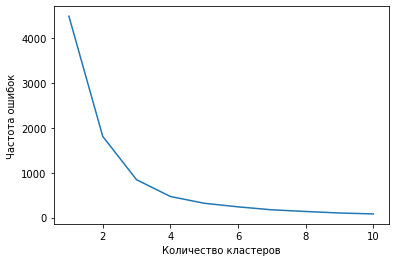

In [53]:
from sklearn.cluster import KMeans
error_rates = [] # список для частоты ошибок при каждом значении колич. классов
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x_clast)
    error_rates.append(kmeans.inertia_)
    
plt.plot(range(1,11), error_rates)
plt.xlabel('Количество кластеров')
plt.ylabel('Частота ошибок')
plt.show

После значения 3 измнение функции замедляется, поэтому возьмем это значение

In [54]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x_clast)

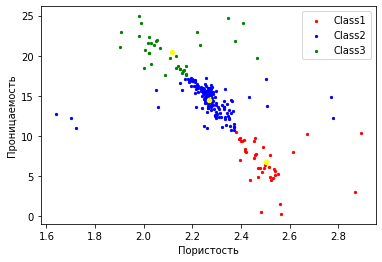

In [55]:
plt.scatter(x_clast[y_kmeans == 0, 0], x_clast[y_kmeans == 0, 1], s = 5, c='red', label='Class1')
plt.scatter(x_clast[y_kmeans == 1, 0], x_clast[y_kmeans == 1, 1], s = 5, c='blue', label='Class2')
plt.scatter(x_clast[y_kmeans == 2, 0], x_clast[y_kmeans == 2, 1], s = 5, c='green', label='Class3')
#plt.scatter(x_clast[y_kmeans == 3, 0], x_clast[y_kmeans == 3, 1], s = 5, c='black', label='Class5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'yellow')
plt.xlabel('Пористость')
plt.ylabel('Проницаемость')
plt.legend()
plt.show()

Для такого вида зависимости метод ближайших соседей сработал, но разделил на кластеры не так, как нужно, поэтому нет возможности уточнения модели.

# Выводы

<b>1</b>. Найдена очень интересная особенность: отствует корреляция между пористостью и минералогической плотностью. Необходимо разобраться, почему так. Ее могло бы не быть по всем образцам вместе, но она бы делилась на подгруппы и мы бы видели это на pairplot, но даже и такого нет.

<b>2</b>. В рамках дипломной работы я делала цифровой гранулометрический анализ, но не могла проверить, сопоставляется ли он с лабораторными данными. По линейной регрессии стало понятно, что абсолютной схожести в методах нет, но соблюдается тенденция, что позволяет попробовать сделать подобную работу на другой коллекции, откоректировав как лабораторную методику, так и цифровую.

<b>3</b>. Предсказать объёмную плотность по коэффициенту пористости на данной выборке сделать не получилось из-за неоднородности отложений. Была попытка исправить положение, убирая вылетающие значения и кластеризовав отложения, однако это не помогло.

<b>4</b>. Несмотря на литологическую неоднородность отложений получилось обучить модель и предсказать пористость по объёму пор и объёмной плотности.